# Linear Regression Project

An Ecommerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

Problem -> The company is trying to decide whether to focus their efforts on their mobile app experience or their website

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('./filez/Ecommerce_Customers.csv')
df.head(3)
# * Avg. Session Length: Average session of in-store style advice sessions.
# * Time on App: Average time spent on App in minutes
# * Time on Website: Average time spent on Website in minutes
# * Length of Membership: How many years the customer has been a member. 

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

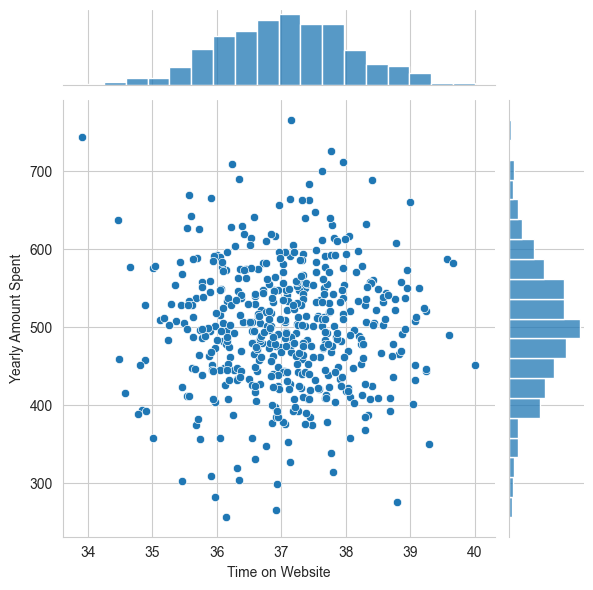

In [6]:
# select only numerical data
df_num = df.select_dtypes(include=[np.number])

# joinplot to compare the `Time on Website` and `Yearly Amount Spent` columns
sns.jointplot(data=df_num, x='Time on Website', y='Yearly Amount Spent')

# => There not seems to be a clear correlation between both

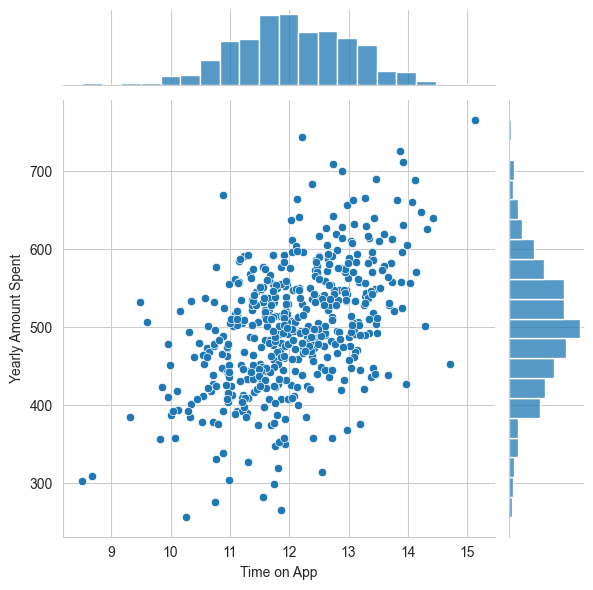

In [7]:
# joinplot to compare the `Time on App` and `Yearly Amount Spent` columns
sns.jointplot(data=df_num, x='Time on App', y='Yearly Amount Spent')

# => A bit more correlation between both

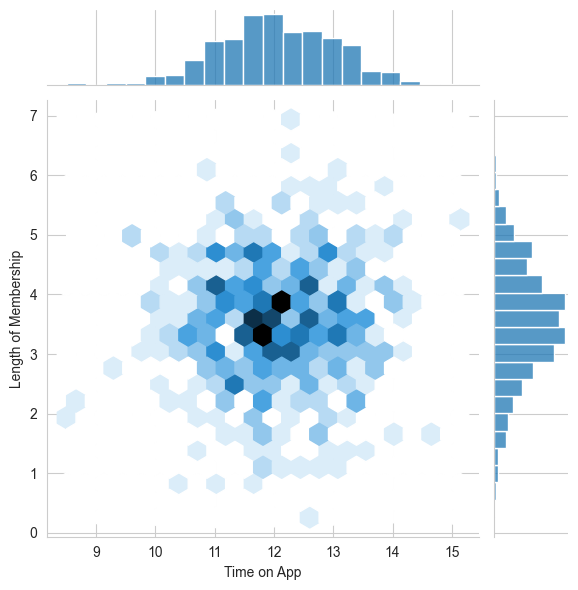

In [8]:
# jointplot to create 2D hex bin plot comparing `Time on App` and `Length of Membership`
sns.jointplot(data=df_num, x='Time on App', y='Length of Membership', kind='hex')

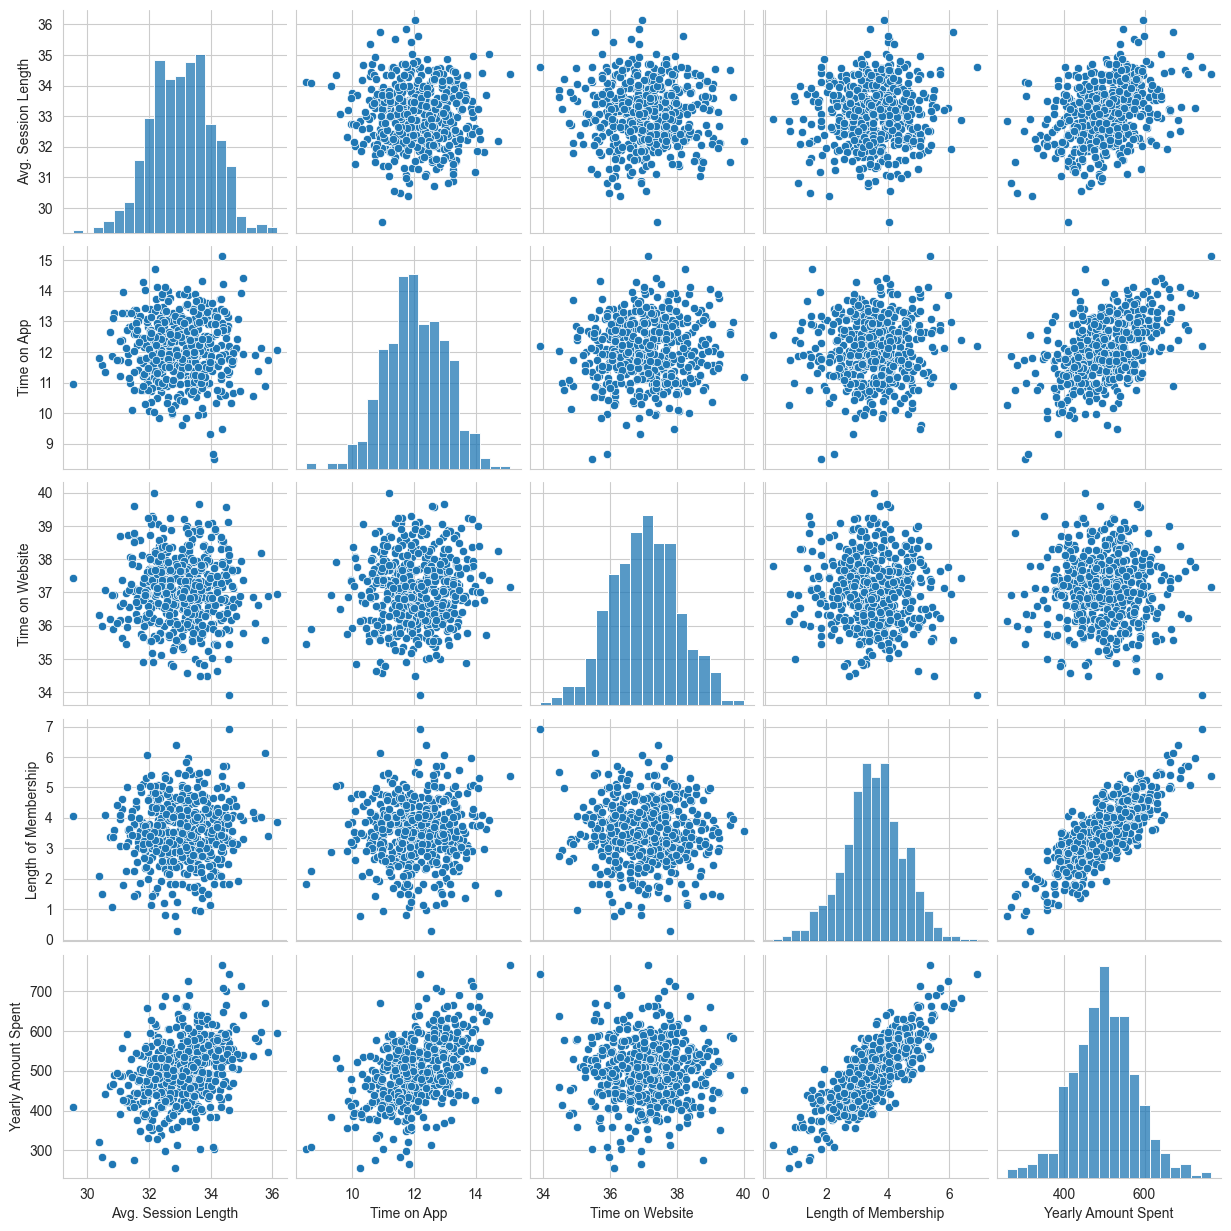

In [9]:
# show relationships across the entire dataset:
sns.pairplot(data=df_num)

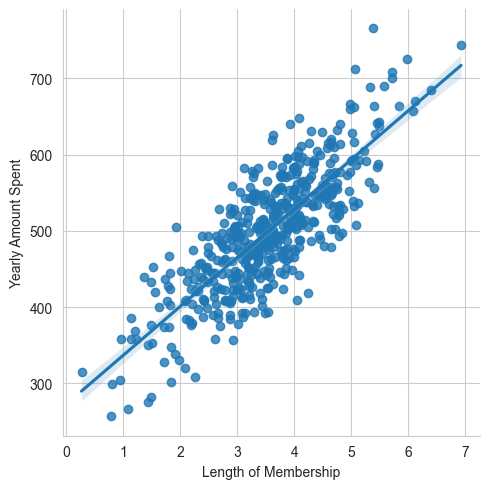

In [10]:
# Based on above chart, the highest correlation seems
# to be `Yearly Amount Spent` and `Length of Membership`

# show linear model plot (implot) of `Yearly Amount Spent`
# and `Length of Membership`
sns.lmplot(data=df_num, x='Length of Membership', y='Yearly Amount Spent')


## Training & Testing Data

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = df[
    [
        "Avg. Session Length",
        "Time on App",
        "Time on Website",
        "Length of Membership",
    ]
]

y = df['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

## Training the Model

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predict Test Data

Text(0, 0.5, 'Predicted Values')

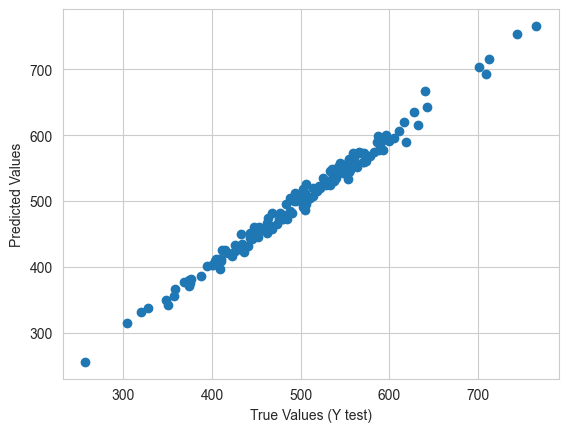

In [20]:
# evaluate the model performance by predicting off the test values:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values (Y test)')
plt.ylabel('Predicted Values')

# looks quite well (a straight line would be a perfect model). There's just
# a bit of noise

## Evaluating the Model

In [17]:
# Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE) and
# Root Mean Squared Error (RMSE):
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f' MAE: {mae}\n MSE: {mse} \n RMSE: {rmse}')

 MAE: 7.228148653430809
 MSE: 79.81305165097419 
 RMSE: 8.93381506697862


In [21]:
# how much of variance our model explains -> we explain 99% of the variance
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

## Residuals

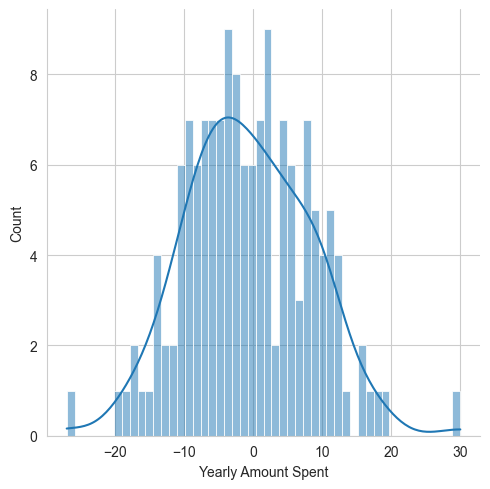

In [18]:
# show histogram of the residuals to make sure it looks normally distributed
# -> looks pretty normal
sns.displot(data=(y_test-predictions), kde=True, bins=50)

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns= ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
"""
Conclusion:
PoV1: we should focus on Website to catch up to the Mobile 
PoV2: develop the App more since it's working better
"""
